In [ ]:
!pip install swig
!pip install "gymnasium[box2d]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp311-cp311-linux_x86_64.whl size=2379446 sha256=e17ca315b61a2638f6976365701686c737a54549afd818f54e8a9a5c93f3ffda
  Stored in directory: /root/.cache/pip/wheels/ab/f1/0c/d56f4a2bdd12bae0a0693ec33f2f0daadb5eb9753c78fa5308
Successfully built box2d-py


In [ ]:
pip install stable-baselines3[extra] gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Episode: 1/15  Reward: -131.40  Epsilon: 0.7366
Episode: 2/15  Reward: -311.69  Epsilon: 0.2482
Episode: 3/15  Reward: -331.37  Epsilon: 0.1437
Episode: 4/15  Reward: -816.10  Epsilon: 0.0645
Episode: 5/15  Reward: -217.59  Epsilon: 0.0113
Episode: 6/15  Reward: -137.44  Epsilon: 0.0100
Episode: 7/15  Reward: -91.38  Epsilon: 0.0100
Episode: 8/15  Reward: -46.94  Epsilon: 0.0100
Episode: 9/15  Reward: -159.18  Epsilon: 0.0100
Episode: 10/15  Reward: -214.25  Epsilon: 0.0100
Episode: 11/15  Reward: -525.34  Epsilon: 0.0100
Episode: 12/15  Reward: -156.77  Epsilon: 0.0100
Episode: 13/15  Reward: -189.74  Epsilon: 0.0100
Episode: 14/15  Reward: 294.25  Epsilon: 0.0100
Episode: 15/15  Reward: -109.49  Epsilon: 0.0100
Model saved as: double_dqn_LunarLander-v3.pth


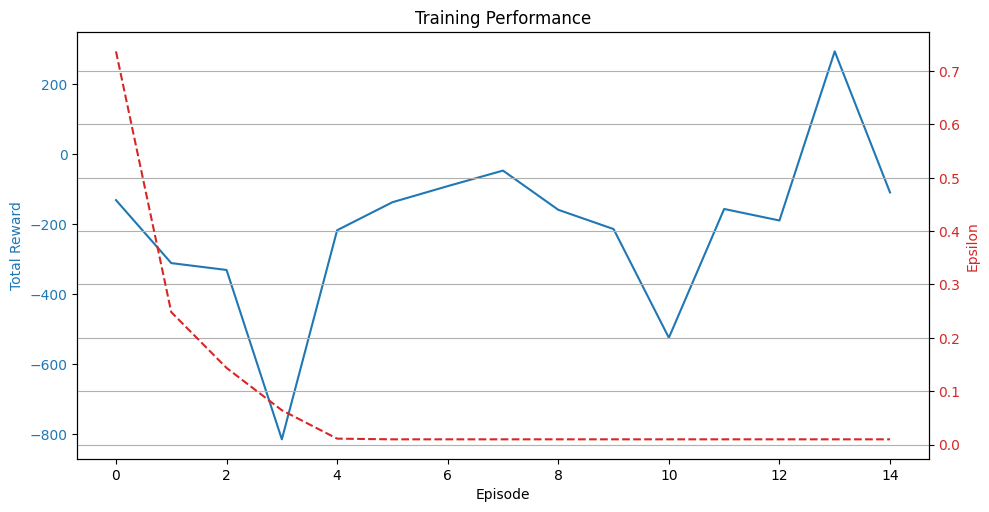

Evaluation Episode: 1  Total Reward: -13.79
Evaluation Episode: 2  Total Reward: -129.44
Evaluation Episode: 3  Total Reward: -184.82
Evaluation Episode: 4  Total Reward: -21.99
Evaluation Episode: 5  Total Reward: -46.61
Evaluation Episode: 6  Total Reward: -105.16
Evaluation Episode: 7  Total Reward: -84.34
Evaluation Episode: 8  Total Reward: -84.50
Evaluation Episode: 9  Total Reward: -39.93
Evaluation Episode: 10  Total Reward: -22.44
Evaluation Episode: 11  Total Reward: -79.31
Evaluation Episode: 12  Total Reward: -94.94
Evaluation Episode: 13  Total Reward: -21.15
Evaluation Episode: 14  Total Reward: -81.33
Evaluation Episode: 15  Total Reward: -77.96


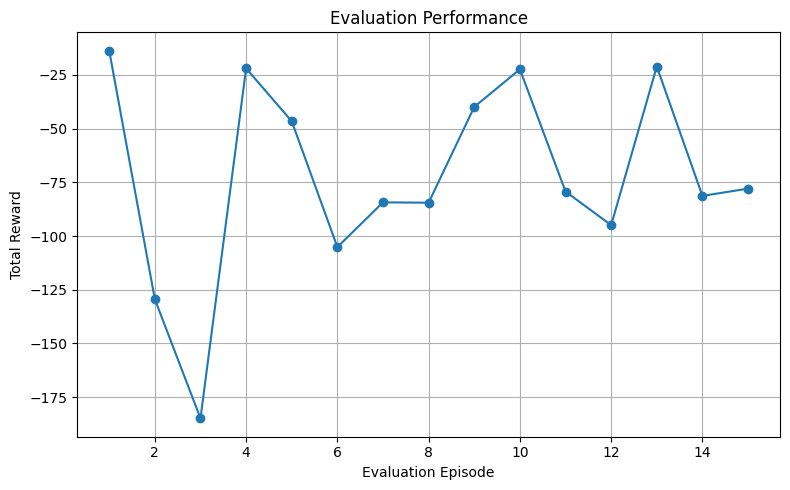

In [ ]:
import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
from collections import deque
import argparse
import matplotlib.pyplot as plt

class QNetwork(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))
    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        return np.array(states), np.array(actions), np.array(rewards), np.array(next_states), np.array(dones)
    def __len__(self):
        return len(self.buffer)

class DQNAgent:
    def __init__(self, state_dim, action_dim, args):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.gamma = args.gamma
        self.epsilon = args.epsilon_start
        self.epsilon_min = args.epsilon_min
        self.epsilon_decay = args.epsilon_decay
        self.batch_size = args.batch_size
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.policy_net = QNetwork(state_dim, action_dim).to(self.device)
        self.target_net = QNetwork(state_dim, action_dim).to(self.device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=args.lr)
        self.buffer = ReplayBuffer(args.buffer_capacity)
        self.update_target_steps = args.update_target_steps
        self.step_count = 0

    def select_action(self, state):
        if random.random() < self.epsilon:
            return random.randrange(self.action_dim)
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        with torch.no_grad():
            q_values = self.policy_net(state_tensor)
        return q_values.argmax().item()

    def update(self):
        if len(self.buffer) < self.batch_size:
            return
        states, actions, rewards, next_states, dones = self.buffer.sample(self.batch_size)
        states = torch.FloatTensor(states).to(self.device)
        actions = torch.LongTensor(actions).unsqueeze(1).to(self.device)
        rewards = torch.FloatTensor(rewards).unsqueeze(1).to(self.device)
        next_states = torch.FloatTensor(next_states).to(self.device)
        dones = torch.FloatTensor(dones).unsqueeze(1).to(self.device)

        q_values = self.policy_net(states).gather(1, actions)

        # Double DQN Target
        with torch.no_grad():
            next_actions = self.policy_net(next_states).argmax(1, keepdim=True)
            next_q_values = self.target_net(next_states).gather(1, next_actions)
            expected_q_values = rewards + self.gamma * next_q_values * (1 - dones)

        loss = nn.MSELoss()(q_values, expected_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        self.step_count += 1
        if self.step_count % self.update_target_steps == 0:
            self.target_net.load_state_dict(self.policy_net.state_dict())

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

def plot_training_results(rewards, epsilons):
    episodes = np.arange(len(rewards))
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Total Reward', color='tab:blue')
    ax1.plot(episodes, rewards, color='tab:blue', label="Total Reward")
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax2 = ax1.twinx()
    ax2.set_ylabel('Epsilon', color='tab:red')
    ax2.plot(episodes, epsilons, color='tab:red', linestyle='--', label="Epsilon")
    ax2.tick_params(axis='y', labelcolor='tab:red')
    fig.tight_layout()
    plt.title("Training Performance")
    plt.grid(True)
    plt.show()

def plot_evaluation_results(evaluation_rewards):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(evaluation_rewards) + 1), evaluation_rewards, marker='o')
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Total Reward")
    plt.title("Evaluation Performance")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def train(env_name, args):
    env = gym.make(env_name)
    state, _ = env.reset()
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    agent = DQNAgent(state_dim, action_dim, args)
    rewards_history = []
    epsilons_history = []
    for episode in range(args.num_episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = agent.select_action(state)
            next_state, reward, done, truncated, _ = env.step(action)
            agent.buffer.push(state, action, reward, next_state, done or truncated)
            state = next_state
            total_reward += reward
            agent.update()
            if done or truncated:
                break
        rewards_history.append(total_reward)
        epsilons_history.append(agent.epsilon)
        print(f"Episode: {episode+1}/{args.num_episodes}  Reward: {total_reward:.2f}  Epsilon: {agent.epsilon:.4f}")
    env.close()

    # Save model with Double DQN filename
    model_path = f"double_dqn_{env_name}.pth"
    torch.save(agent.policy_net.state_dict(), model_path)
    print(f"Model saved as: {model_path}")

    plot_training_results(rewards_history, epsilons_history)
    return rewards_history, epsilons_history

def evaluate_agent(env_name, model_path, num_episodes=5):
    env = gym.make(env_name)
    state, _ = env.reset()
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    args = argparse.Namespace(lr=0.001, gamma=0.99, epsilon_start=0.0, epsilon_min=0.0, epsilon_decay=1.0,
                              batch_size=64, buffer_capacity=10000, update_target_steps=100)
    agent = DQNAgent(state_dim, action_dim, args)
    agent.policy_net.load_state_dict(torch.load(model_path, map_location=agent.device))
    agent.policy_net.eval()
    evaluation_rewards = []

    for episode in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False
        while not done:
            state_tensor = torch.FloatTensor(state).unsqueeze(0).to(agent.device)
            with torch.no_grad():
                q_values = agent.policy_net(state_tensor)
            action = q_values.argmax().item()
            next_state, reward, done, truncated, _ = env.step(action)
            total_reward += reward
            state = next_state
            if done or truncated:
                print(f"Evaluation Episode: {episode+1}  Total Reward: {total_reward:.2f}")
                evaluation_rewards.append(total_reward)
                break
    env.close()
    return evaluation_rewards

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--env", type=str, default="LunarLander-v3")
    parser.add_argument("--num_episodes", type=int, default=15)
    parser.add_argument("--lr", type=float, default=0.001)
    parser.add_argument("--gamma", type=float, default=0.99)
    parser.add_argument("--epsilon_start", type=float, default=1.0)
    parser.add_argument("--epsilon_min", type=float, default=0.01)
    parser.add_argument("--epsilon_decay", type=float, default=0.995)
    parser.add_argument("--batch_size", type=int, default=64)
    parser.add_argument("--buffer_capacity", type=int, default=10000)
    parser.add_argument("--update_target_steps", type=int, default=100)
    parser.add_argument("--test", action="store_true")
    parser.add_argument("--test_episodes", type=int, default=5)
    args, _ = parser.parse_known_args()

    model_file = f"double_dqn_{args.env}.pth"

    if args.test:
        evaluation_rewards = evaluate_agent(args.env, model_file, args.test_episodes)
        plot_evaluation_results(evaluation_rewards)
    else:
        training_rewards, epsilons = train(args.env, args)
        evaluation_rewards = evaluate_agent(args.env, model_file, num_episodes=15)
        plot_evaluation_results(evaluation_rewards)

Starting training on CartPole-v1
[CartPole-v1] Episode: 1/100  Reward: 23.00  Epsilon: 1.0000
[CartPole-v1] Episode: 2/100  Reward: 10.00  Epsilon: 1.0000
[CartPole-v1] Episode: 3/100  Reward: 20.00  Epsilon: 1.0000
[CartPole-v1] Episode: 4/100  Reward: 13.00  Epsilon: 0.9851
[CartPole-v1] Episode: 5/100  Reward: 34.00  Epsilon: 0.8307
[CartPole-v1] Episode: 6/100  Reward: 17.00  Epsilon: 0.7629
[CartPole-v1] Episode: 7/100  Reward: 19.00  Epsilon: 0.6936
[CartPole-v1] Episode: 8/100  Reward: 14.00  Epsilon: 0.6466
[CartPole-v1] Episode: 9/100  Reward: 38.00  Epsilon: 0.5344
[CartPole-v1] Episode: 10/100  Reward: 25.00  Epsilon: 0.4715
[CartPole-v1] Episode: 11/100  Reward: 11.00  Epsilon: 0.4462
[CartPole-v1] Episode: 12/100  Reward: 9.00  Epsilon: 0.4265
[CartPole-v1] Episode: 13/100  Reward: 13.00  Epsilon: 0.3996
[CartPole-v1] Episode: 14/100  Reward: 9.00  Epsilon: 0.3820
[CartPole-v1] Episode: 15/100  Reward: 13.00  Epsilon: 0.3579
[CartPole-v1] Episode: 16/100  Reward: 23.00  Ep

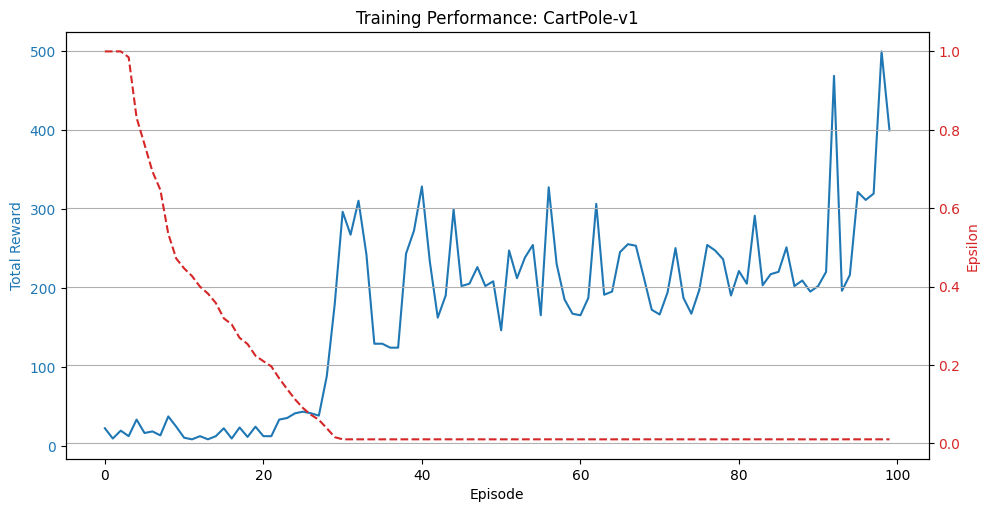

[CartPole-v1] Eval Episode: 1  Total Reward: 500.00
[CartPole-v1] Eval Episode: 2  Total Reward: 500.00
[CartPole-v1] Eval Episode: 3  Total Reward: 500.00
[CartPole-v1] Eval Episode: 4  Total Reward: 500.00
[CartPole-v1] Eval Episode: 5  Total Reward: 500.00
[CartPole-v1] Eval Episode: 6  Total Reward: 500.00
[CartPole-v1] Eval Episode: 7  Total Reward: 500.00
[CartPole-v1] Eval Episode: 8  Total Reward: 500.00
[CartPole-v1] Eval Episode: 9  Total Reward: 500.00
[CartPole-v1] Eval Episode: 10  Total Reward: 500.00
[CartPole-v1] Eval Episode: 11  Total Reward: 500.00
[CartPole-v1] Eval Episode: 12  Total Reward: 500.00
[CartPole-v1] Eval Episode: 13  Total Reward: 500.00
[CartPole-v1] Eval Episode: 14  Total Reward: 500.00
[CartPole-v1] Eval Episode: 15  Total Reward: 500.00
[CartPole-v1] Eval Episode: 16  Total Reward: 500.00
[CartPole-v1] Eval Episode: 17  Total Reward: 500.00
[CartPole-v1] Eval Episode: 18  Total Reward: 500.00
[CartPole-v1] Eval Episode: 19  Total Reward: 500.00
[C

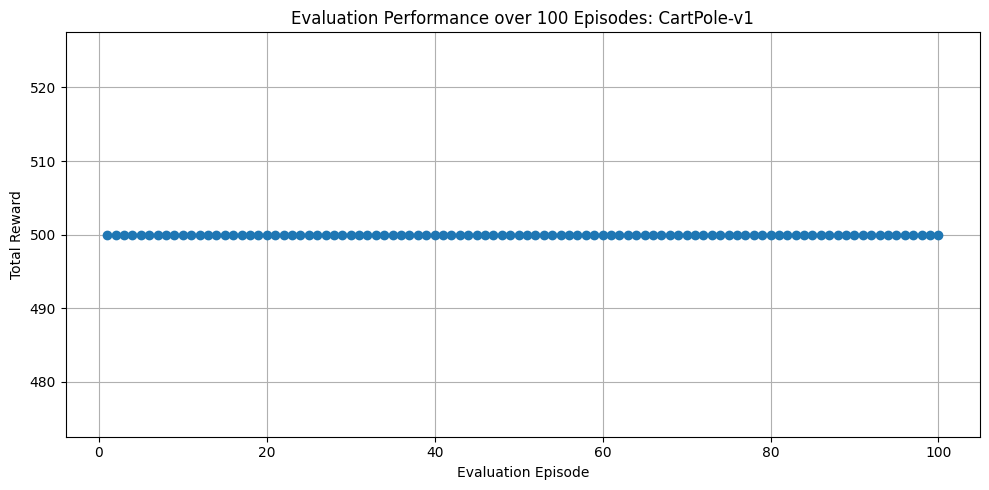

Starting training on LunarLander-v3
[LunarLander-v3] Episode: 1/100  Reward: -367.59  Epsilon: 0.9229
[LunarLander-v3] Episode: 2/100  Reward: -71.25  Epsilon: 0.6027
[LunarLander-v3] Episode: 3/100  Reward: -105.22  Epsilon: 0.2136
[LunarLander-v3] Episode: 4/100  Reward: -307.64  Epsilon: 0.1262
[LunarLander-v3] Episode: 5/100  Reward: -473.45  Epsilon: 0.0792
[LunarLander-v3] Episode: 6/100  Reward: -299.55  Epsilon: 0.0440
[LunarLander-v3] Episode: 7/100  Reward: -377.67  Epsilon: 0.0283
[LunarLander-v3] Episode: 8/100  Reward: -264.76  Epsilon: 0.0180
[LunarLander-v3] Episode: 9/100  Reward: -85.19  Epsilon: 0.0100
[LunarLander-v3] Episode: 10/100  Reward: -291.12  Epsilon: 0.0100
[LunarLander-v3] Episode: 11/100  Reward: -118.10  Epsilon: 0.0100
[LunarLander-v3] Episode: 12/100  Reward: -112.97  Epsilon: 0.0100
[LunarLander-v3] Episode: 13/100  Reward: -200.78  Epsilon: 0.0100
[LunarLander-v3] Episode: 14/100  Reward: -159.22  Epsilon: 0.0100
[LunarLander-v3] Episode: 15/100  Rew

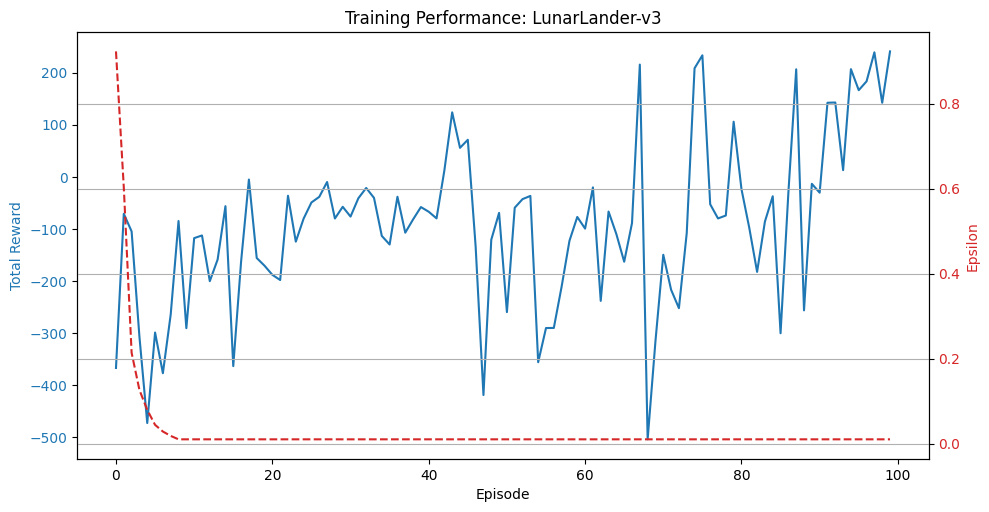

[LunarLander-v3] Eval Episode: 1  Total Reward: -171.86
[LunarLander-v3] Eval Episode: 2  Total Reward: -106.83
[LunarLander-v3] Eval Episode: 3  Total Reward: 230.89
[LunarLander-v3] Eval Episode: 4  Total Reward: -43.68
[LunarLander-v3] Eval Episode: 5  Total Reward: -21.82
[LunarLander-v3] Eval Episode: 6  Total Reward: 228.15
[LunarLander-v3] Eval Episode: 7  Total Reward: -64.70
[LunarLander-v3] Eval Episode: 8  Total Reward: -189.66
[LunarLander-v3] Eval Episode: 9  Total Reward: -19.38
[LunarLander-v3] Eval Episode: 10  Total Reward: 261.28
[LunarLander-v3] Eval Episode: 11  Total Reward: -90.13
[LunarLander-v3] Eval Episode: 12  Total Reward: -96.94
[LunarLander-v3] Eval Episode: 13  Total Reward: 173.05
[LunarLander-v3] Eval Episode: 14  Total Reward: -76.12
[LunarLander-v3] Eval Episode: 15  Total Reward: 251.35
[LunarLander-v3] Eval Episode: 16  Total Reward: -14.14
[LunarLander-v3] Eval Episode: 17  Total Reward: 244.48
[LunarLander-v3] Eval Episode: 18  Total Reward: 251.4

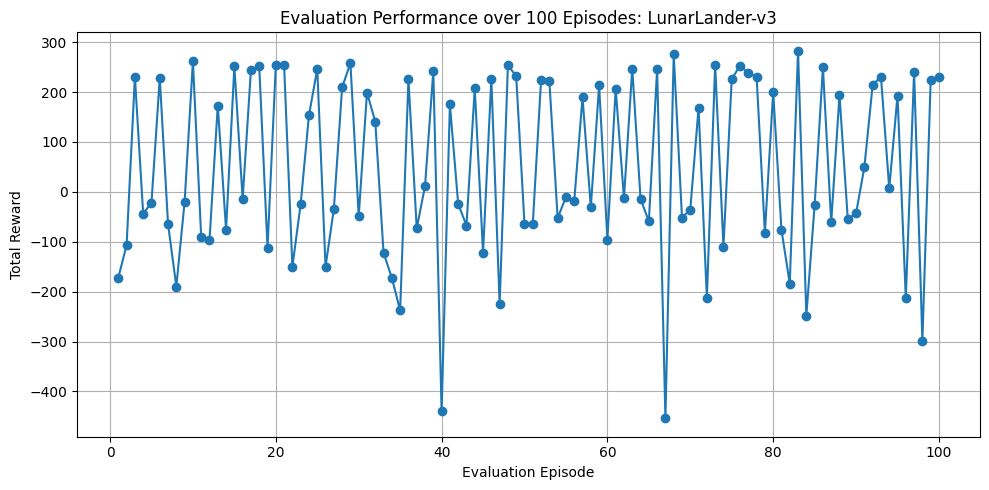

In [ ]:
import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
from collections import deque
import argparse
import matplotlib.pyplot as plt

class QNetwork(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))
    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        return np.array(states), np.array(actions), np.array(rewards), np.array(next_states), np.array(dones)
    def __len__(self):
        return len(self.buffer)

class DQNAgent:
    def __init__(self, state_dim, action_dim, args):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.gamma = args.gamma
        self.epsilon = args.epsilon_start
        self.epsilon_min = args.epsilon_min
        self.epsilon_decay = args.epsilon_decay
        self.batch_size = args.batch_size
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.policy_net = QNetwork(state_dim, action_dim).to(self.device)
        self.target_net = QNetwork(state_dim, action_dim).to(self.device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=args.lr)
        self.buffer = ReplayBuffer(args.buffer_capacity)
        self.update_target_steps = args.update_target_steps
        self.step_count = 0

    def select_action(self, state):
        if random.random() < self.epsilon:
            return random.randrange(self.action_dim)
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        with torch.no_grad():
            q_values = self.policy_net(state_tensor)
        return q_values.argmax().item()

    def update(self):
        if len(self.buffer) < self.batch_size:
            return
        states, actions, rewards, next_states, dones = self.buffer.sample(self.batch_size)
        states = torch.FloatTensor(states).to(self.device)
        actions = torch.LongTensor(actions).unsqueeze(1).to(self.device)
        rewards = torch.FloatTensor(rewards).unsqueeze(1).to(self.device)
        next_states = torch.FloatTensor(next_states).to(self.device)
        dones = torch.FloatTensor(dones).unsqueeze(1).to(self.device)

        q_values = self.policy_net(states).gather(1, actions)

        # Double DQN
        with torch.no_grad():
            next_actions = self.policy_net(next_states).argmax(1, keepdim=True)
            next_q_values = self.target_net(next_states).gather(1, next_actions)
            expected_q_values = rewards + self.gamma * next_q_values * (1 - dones)

        loss = nn.MSELoss()(q_values, expected_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        self.step_count += 1
        if self.step_count % self.update_target_steps == 0:
            self.target_net.load_state_dict(self.policy_net.state_dict())
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

def plot_training_results(rewards, epsilons, env_name):
    episodes = np.arange(len(rewards))
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Total Reward', color='tab:blue')
    ax1.plot(episodes, rewards, color='tab:blue', label="Total Reward")
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax2 = ax1.twinx()
    ax2.set_ylabel('Epsilon', color='tab:red')
    ax2.plot(episodes, epsilons, color='tab:red', linestyle='--', label="Epsilon")
    ax2.tick_params(axis='y', labelcolor='tab:red')
    fig.tight_layout()
    plt.title(f"Training Performance: {env_name}")
    plt.grid(True)
    plt.show()

def plot_evaluation_results(eval_rewards, env_name):
    episodes = np.arange(1, len(eval_rewards) + 1)
    plt.figure(figsize=(10, 5))
    plt.plot(episodes, eval_rewards, marker='o')
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Total Reward")
    plt.title(f"Evaluation Performance over 100 Episodes: {env_name}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def evaluate_agent(env_name, model_path, num_episodes=100):
    env = gym.make(env_name)
    state, _ = env.reset()
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    args = argparse.Namespace(lr=0.001, gamma=0.99, epsilon_start=0.0, epsilon_min=0.0,
                              epsilon_decay=1.0, batch_size=64, buffer_capacity=10000, update_target_steps=100)
    agent = DQNAgent(state_dim, action_dim, args)
    agent.policy_net.load_state_dict(torch.load(model_path, map_location=agent.device))
    agent.policy_net.eval()
    eval_rewards = []
    for episode in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False
        while not done:
            state_tensor = torch.FloatTensor(state).unsqueeze(0).to(agent.device)
            with torch.no_grad():
                q_values = agent.policy_net(state_tensor)
            action = q_values.argmax().item()
            next_state, reward, done, truncated, _ = env.step(action)
            total_reward += reward
            state = next_state
            if done or truncated:
                print(f"[{env_name}] Eval Episode: {episode+1}  Total Reward: {total_reward:.2f}")
                break
        eval_rewards.append(total_reward)
    env.close()
    return eval_rewards

def train(env_name, args):
    print(f"Starting training on {env_name}")
    env = gym.make(env_name)
    state, _ = env.reset()
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    agent = DQNAgent(state_dim, action_dim, args)
    rewards_history = []
    epsilons_history = []
    for episode in range(args.num_episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = agent.select_action(state)
            next_state, reward, done, truncated, _ = env.step(action)
            agent.buffer.push(state, action, reward, next_state, done or truncated)
            state = next_state
            total_reward += reward
            agent.update()
            if done or truncated:
                break
        rewards_history.append(total_reward)
        epsilons_history.append(agent.epsilon)
        print(f"[{env_name}] Episode: {episode+1}/{args.num_episodes}  Reward: {total_reward:.2f}  Epsilon: {agent.epsilon:.4f}")
    env.close()

    model_path = f"double_dqn_{env_name}.pth"
    torch.save(agent.policy_net.state_dict(), model_path)
    print(f"Model saved to {model_path}")
    plot_training_results(rewards_history, epsilons_history, env_name)
    return rewards_history, epsilons_history

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--env", type=str, default="both", help='Environment name: "CartPole-v1", "LunarLander-v3", or "both"')
    parser.add_argument("--num_episodes", type=int, default=100)
    parser.add_argument("--lr", type=float, default=0.001)
    parser.add_argument("--gamma", type=float, default=0.99)
    parser.add_argument("--epsilon_start", type=float, default=1.0)
    parser.add_argument("--epsilon_min", type=float, default=0.01)
    parser.add_argument("--epsilon_decay", type=float, default=0.995)
    parser.add_argument("--batch_size", type=int, default=64)
    parser.add_argument("--buffer_capacity", type=int, default=10000)
    parser.add_argument("--update_target_steps", type=int, default=100)
    parser.add_argument("--test", action="store_true")
    parser.add_argument("--test_episodes", type=int, default=100)  # Updated for 100 eval episodes
    args, _ = parser.parse_known_args()

    envs = ["CartPole-v1", "LunarLander-v3"] if args.env.lower() == "both" else [args.env]

    for env_name in envs:
        model_path = f"double_dqn_{env_name}.pth"
        if args.test:
            eval_rewards = evaluate_agent(env_name, model_path, args.test_episodes)
            plot_evaluation_results(eval_rewards, env_name)
        else:
            train_rewards, epsilons = train(env_name, args)
            eval_rewards = evaluate_agent(env_name, model_path, args.test_episodes)
            plot_evaluation_results(eval_rewards, env_name)

Training DQN (red)...
Episode 1: Reward = -176.00, Epsilon = 0.9900
Episode 2: Reward = -240.00, Epsilon = 0.9801


<ipython-input-10-18517c1e4e55>:126: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  states = torch.FloatTensor(states)


Episode 3: Reward = -221.00, Epsilon = 0.9703
Episode 4: Reward = -297.00, Epsilon = 0.9606
Episode 5: Reward = -107.00, Epsilon = 0.9510
Episode 6: Reward = -221.00, Epsilon = 0.9415
Episode 7: Reward = -145.00, Epsilon = 0.9321
Episode 8: Reward = -145.00, Epsilon = 0.9227
Episode 9: Reward = -126.00, Epsilon = 0.9135
Episode 10: Reward = -107.00, Epsilon = 0.9044
Episode 11: Reward = -202.00, Epsilon = 0.8953
Episode 12: Reward = -240.00, Epsilon = 0.8864
Episode 13: Reward = -240.00, Epsilon = 0.8775
Episode 14: Reward = -202.00, Epsilon = 0.8687
Episode 15: Reward = -221.00, Epsilon = 0.8601
Episode 16: Reward = -259.00, Epsilon = 0.8515
Episode 17: Reward = -126.00, Epsilon = 0.8429
Episode 18: Reward = -278.00, Epsilon = 0.8345
Episode 19: Reward = -202.00, Epsilon = 0.8262
Episode 20: Reward = -88.00, Epsilon = 0.8179
Episode 21: Reward = -252.00, Epsilon = 0.8097
Episode 22: Reward = -145.00, Epsilon = 0.8016
Episode 23: Reward = -278.00, Epsilon = 0.7936
Episode 24: Reward = 

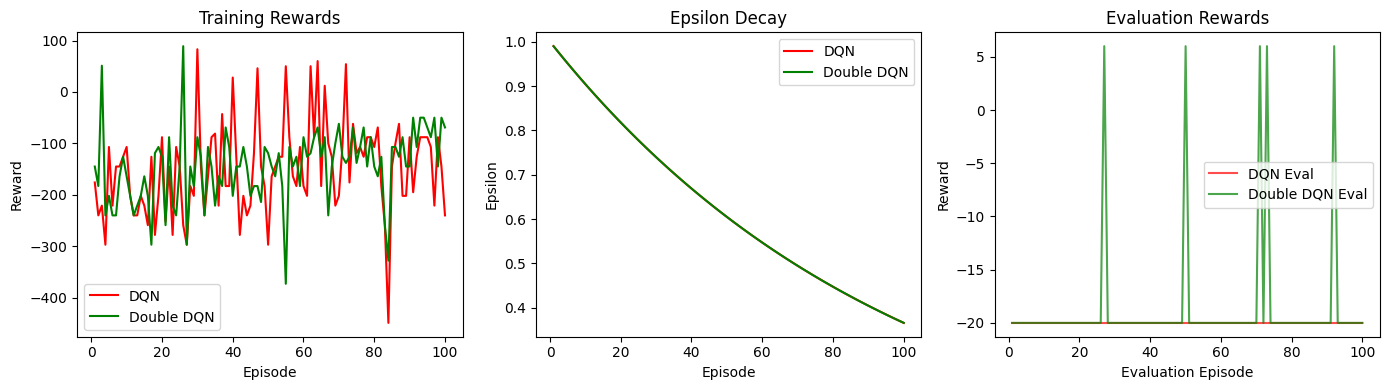

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
import gymnasium as gym
from gymnasium import spaces
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

# ------------------ Warehouse Environment ------------------
class WarehouseEnv(gym.Env):
    def __init__(self, grid_size=(6, 6), deterministic=True, move_prob=0.9, num_items=1):
        super().__init__()
        self.grid_size = grid_size
        self.deterministic = deterministic
        self.move_prob = move_prob
        self.num_items = num_items
        self.action_space = spaces.Discrete(6)
        self.observation_space = spaces.Tuple((spaces.Discrete(grid_size[0]),
                                                spaces.Discrete(grid_size[1]),
                                                spaces.Discrete(2)))
        self.obstacles = {(3, 2), (2, 3), (3, 3), (5, 3)}
        self.drop_locations = [(0, 2)] * num_items
        self.reset()

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        open_positions = [(x, y) for x in range(self.grid_size[0]) for y in range(self.grid_size[1])
                          if (x, y) not in self.obstacles and (x, y) not in [(0, 0), (0, 2)]]
        self.item_locations = random.sample(open_positions, self.num_items)
        self.robot_position = (0, 0)
        self.carrying_item = False
        self.current_item_index = 0
        self.done = False
        return self._get_state(), {}

    def step(self, action):
        if self.done:
            return self._get_state(), 0, True, False, {}
        reward = -1
        move_actions = {0: (-1, 0), 1: (1, 0), 2: (0, -1), 3: (0, 1)}
        if action in move_actions:
            new_pos = (self.robot_position[0] + move_actions[action][0],
                       self.robot_position[1] + move_actions[action][1])
            if self._is_valid(new_pos):
                if self.deterministic or random.random() < self.move_prob:
                    self.robot_position = new_pos
            else:
                reward = -20
        elif action == 4 and not self.carrying_item and self.robot_position == self.item_locations[self.current_item_index]:
            self.carrying_item = True
            reward = 25
        elif action == 5 and self.carrying_item and self.robot_position == self.drop_locations[self.current_item_index]:
            self.carrying_item = False
            reward = 100
            self.current_item_index += 1
            if self.current_item_index >= self.num_items:
                self.done = True
        return self._get_state(), reward, self.done, False, {}

    def _is_valid(self, pos):
        return 0 <= pos[0] < self.grid_size[0] and 0 <= pos[1] < self.grid_size[1] and pos not in self.obstacles

    def _get_state(self):
        return (*self.robot_position, int(self.carrying_item))

    def render(self, title="Warehouse Robot"):
        grid = np.zeros(self.grid_size)
        for obs in self.obstacles:
            grid[obs] = 1
        for item in self.item_locations:
            grid[item] = 2
        for drop in self.drop_locations:
            grid[drop] = 3
        grid[self.robot_position] = 4
        plt.clf()
        plt.imshow(grid, cmap="Set3", vmin=0, vmax=4)
        plt.title(title)
        plt.colorbar(ticks=[0, 1, 2, 3, 4])
        plt.pause(0.001)

# ------------------ Q-Network ------------------
class QNetwork(nn.Module):
    def __init__(self, state_dim, action_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_dim, 128), nn.ReLU(),
            nn.Linear(128, 64), nn.ReLU(),
            nn.Linear(64, action_dim))
    def forward(self, x):
        return self.fc(x)

# ------------------ Agent Class (supports double DQN) ------------------
class Agent:
    def __init__(self, state_dim, action_dim, double=False):
        self.policy_net = QNetwork(state_dim, action_dim)
        self.target_net = QNetwork(state_dim, action_dim)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=1e-3)
        self.loss_fn = nn.MSELoss()
        self.memory = deque(maxlen=500)
        self.batch_size = 32
        self.gamma = 0.99
        self.epsilon = 1.0
        self.epsilon_min = 0.1
        self.epsilon_decay = 0.99
        self.double = double
        self.state_dim = state_dim
        self.action_dim = action_dim

    def act(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, self.action_dim - 1)
        state = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            return self.policy_net(state).argmax().item()

    def remember(self, transition):
        self.memory.append(transition)

    def train(self):
        if len(self.memory) < self.batch_size:
            return
        states, actions, rewards, next_states, dones = zip(*random.sample(self.memory, self.batch_size))
        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions).unsqueeze(1)
        rewards = torch.FloatTensor(rewards).unsqueeze(1)
        next_states = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones).unsqueeze(1)

        q_values = self.policy_net(states).gather(1, actions)
        with torch.no_grad():
            if self.double:
                next_actions = self.policy_net(next_states).argmax(1, keepdim=True)
                next_q = self.target_net(next_states).gather(1, next_actions)
            else:
                next_q = self.target_net(next_states).max(1)[0].unsqueeze(1)
            target_q = rewards + self.gamma * next_q * (1 - dones)

        loss = self.loss_fn(q_values, target_q)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target(self):
        self.target_net.load_state_dict(self.policy_net.state_dict())

# ------------------ Training Function ------------------
def train_agent(env, agent, episodes=100, max_steps=50):
    rewards_history = []
    epsilons_history = []
    for ep in range(episodes):
        state, _ = env.reset()
        state = np.array(state, dtype=np.float32)
        total_reward = 0
        for _ in range(max_steps):
            action = agent.act(state)
            next_state, reward, done, _, _ = env.step(action)
            next_state = np.array(next_state, dtype=np.float32)
            agent.remember((state, action, reward, next_state, done))
            agent.train()
            state = next_state
            total_reward += reward
            if done:
                break
        agent.update_target()
        agent.epsilon = max(agent.epsilon * agent.epsilon_decay, agent.epsilon_min)
        rewards_history.append(total_reward)
        epsilons_history.append(agent.epsilon)
        print(f"Episode {ep+1}: Reward = {total_reward:.2f}, Epsilon = {agent.epsilon:.4f}")
    return rewards_history, epsilons_history

# ------------------ Evaluation Function ------------------
def evaluate_agent(env_fn, agent, episodes=100, max_steps=20):
    eval_rewards = []
    for ep in range(episodes):
        env = env_fn()  # Create a fresh env instance per episode
        state, _ = env.reset()
        state = np.array(state, dtype=np.float32)
        total = 0
        for _ in range(max_steps):
            with torch.no_grad():
                action = agent.policy_net(torch.FloatTensor(state).unsqueeze(0)).argmax().item()
            state, reward, done, _, _ = env.step(action)
            state = np.array(state, dtype=np.float32)
            total += reward
            if done:
                break
        eval_rewards.append(total)
        env.close()
    return eval_rewards

# ------------------ Plotting Comparison ------------------
def plot_comparison(dqn_rewards, dqn_eps, ddqn_rewards, ddqn_eps, dqn_eval, ddqn_eval):
    episodes = np.arange(1, len(dqn_rewards)+1)

    plt.figure(figsize=(14, 4))
    # Training rewards comparison
    plt.subplot(1, 3, 1)
    plt.plot(episodes, dqn_rewards, label="DQN", color='red')
    plt.plot(episodes, ddqn_rewards, label="Double DQN", color='green')
    plt.title("Training Rewards")
    plt.xlabel("Episode")
    plt.ylabel("Reward")
    plt.legend()

    # Epsilon decay comparison
    plt.subplot(1, 3, 2)
    plt.plot(episodes, dqn_eps, label="DQN", color='red')
    plt.plot(episodes, ddqn_eps, label="Double DQN", color='green')
    plt.title("Epsilon Decay")
    plt.xlabel("Episode")
    plt.ylabel("Epsilon")
    plt.legend()

    # Evaluation rewards comparison
    plt.subplot(1, 3, 3)
    eval_episodes = np.arange(1, len(dqn_eval)+1)
    plt.plot(eval_episodes, dqn_eval, label="DQN Eval", color='red', alpha=0.7)
    plt.plot(eval_episodes, ddqn_eval, label="Double DQN Eval", color='green', alpha=0.7)
    plt.title("Evaluation Rewards")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Reward")
    plt.legend()

    plt.tight_layout()
    plt.show()

# ------------------ Main Run ------------------
if __name__ == "__main__":
    # We'll use WarehouseEnv for both agents
    env_fn = lambda: WarehouseEnv()

    # Create separate environment instances for training
    env1 = WarehouseEnv()
    env2 = WarehouseEnv()

    # Create agents: one DQN (double=False) and one Double DQN (double=True)
    dqn_agent = Agent(3, env1.action_space.n, double=False)
    ddqn_agent = Agent(3, env2.action_space.n, double=True)

    print("Training DQN (red)...")
    dqn_train_rewards, dqn_eps = train_agent(env1, dqn_agent, episodes=100)
    print("\nTraining Double DQN (green)...")
    ddqn_train_rewards, ddqn_eps = train_agent(env2, ddqn_agent, episodes=100)

    # Evaluate each agent using a fresh env instance per evaluation episode
    dqn_eval_rewards = evaluate_agent(lambda: WarehouseEnv(), dqn_agent, episodes=100)
    ddqn_eval_rewards = evaluate_agent(lambda: WarehouseEnv(), ddqn_agent, episodes=100)

    plot_comparison(dqn_train_rewards, dqn_eps, ddqn_train_rewards, ddqn_eps, dqn_eval_rewards, ddqn_eval_rewards)